# Visualización de objetos asociados a tratamientos de radioterapia
------

## Estudio de CT

Los datos anatómicos para la *simulación* del tratamiento del paciente se adquieren mediante un estudio de tomografía computerizada *CT* con el paciente inmobilizaddo en una postura que sea reproducible a lo largo del tratamiento.

In [1]:
%cd ..

/Users/cesar/Documents/Development/GitHub/rtviewer


In [2]:
from skrt import Image

In [3]:
im = Image('patients/TestMamaDer001/20230116_095704/CT/20230116_095704')

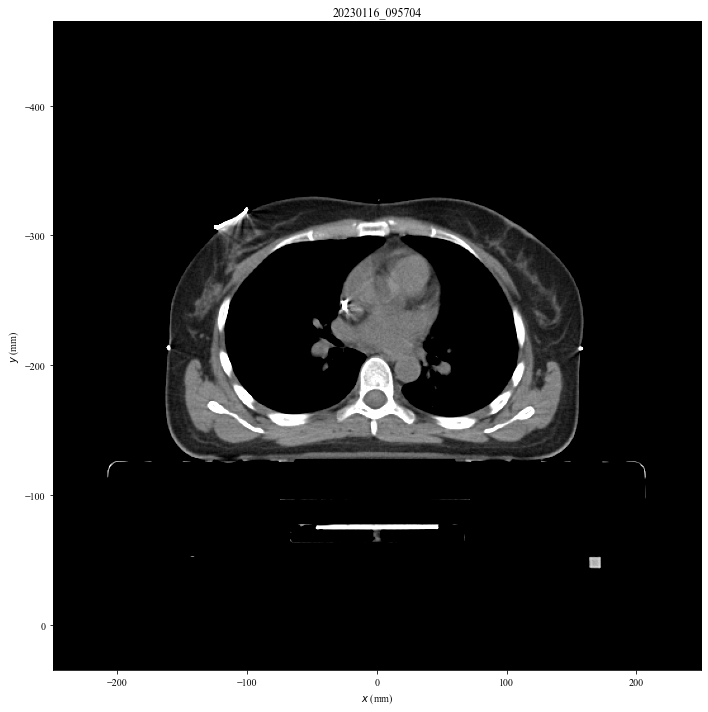

In [4]:
im.plot('x-y', idx = 30, figsize=10) 
# Cambiar el valor de idx para cambiar el plano visualizado
# Selcción de orientación de los planos  
## 'x-y' Axial
## 'x-z' Coronal
## 'y-z' Sagital  

## Estructuras

Los volumenes relevantes para la planificación, sean bien objetivos o bien regiones de interés, se tienen que delimitar sobre el estudio CT de simulación.

Las imágenes se tienen que segmentar mediante procesos manuales o semiautomáticos. Estos últimos utilizan procedimientos de base de conocimiento que se ha tenido que establecer mediante procesos manuales.

In [5]:
from skrt import StructureSet

In [6]:
ss = StructureSet('patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm')

Los conjuntos de estructuras se visualizan asociándolos a la imagen a partir de la quee han sido generados

In [7]:
im.add_structure_set(ss)

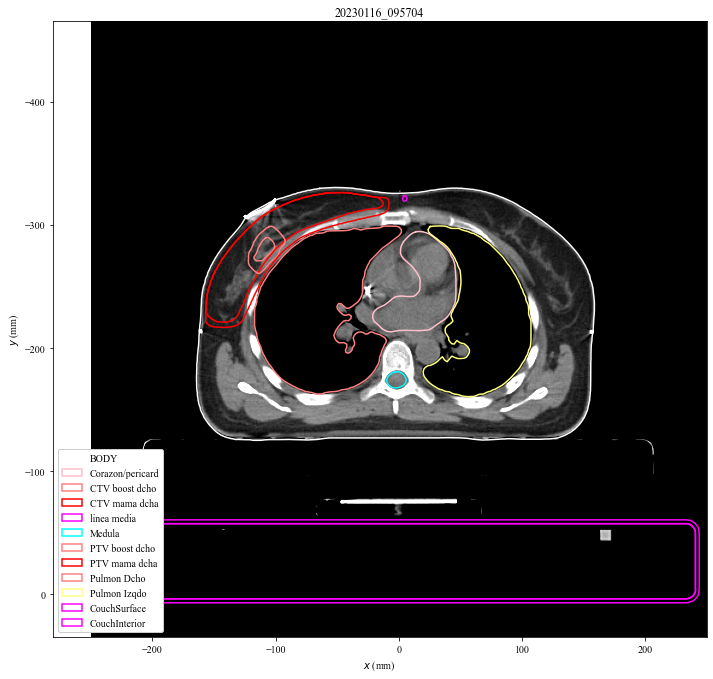

In [8]:
im.plot(idx=30, figsize=10, rois='all', legend=True)

In [9]:
from skrt import Patient

In [14]:
pat = Patient('patients/TestMamaDer001')

In [17]:
pat.studies[0]


Study
{
  ct_doses: [4 * <class 'skrt.dose.Dose'>] 
  ct_images: [1 * <class 'skrt.image.Image'>] 
  ct_plans: [4 * <class 'skrt.dose.Plan'>] 
  ct_structure_sets: [2 * <class 'skrt.structures.StructureSet'>] 
  date: '20230116' 
  dose_types: {1 * keys of type <class 'str'>} 
  files: [4 * <class 'skrt.core.File'>] 
  image_types: {1 * keys of type <class 'str'>} 
  path: '/Users/cesar/Documents/Development/GitHub/rtviewer/patients/TestMamaDer001/20230116_095704' 
  patient: <class 'skrt.patient.Patient'> 
  plan_types: {1 * keys of type <class 'str'>} 
  print_depth: 0 
  structure_set_types: {1 * keys of type <class 'str'>} 
  subdir: '' 
  time: '095704' 
  timestamp: '20230116_095704' 
}

In [18]:
stdy = pat.studies[0]

In [38]:
ss1 = stdy.ct_structure_sets[1]

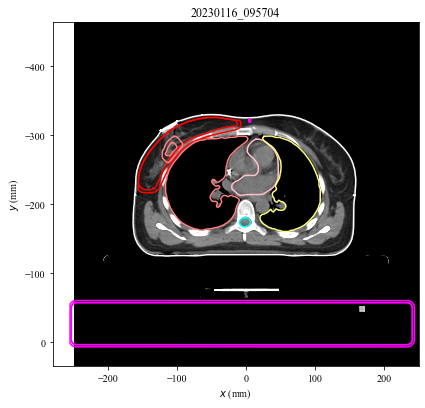

In [43]:
ss1.plot()

In [40]:
from matplotlib import pyplot as plt

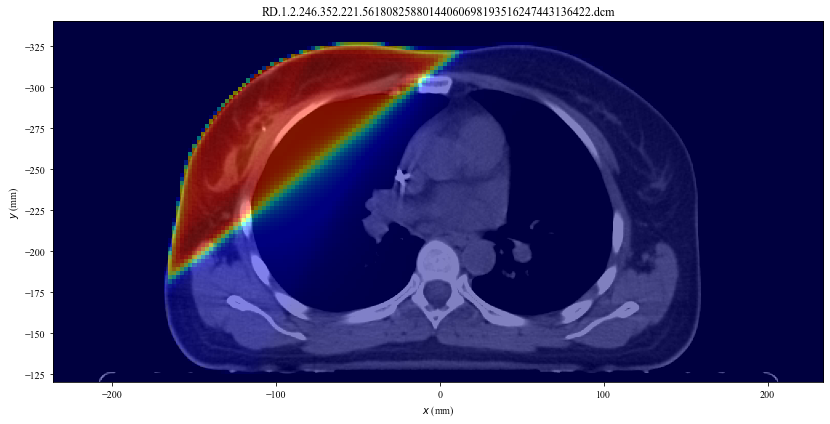

In [36]:
stdy.ct_doses[0].plot()

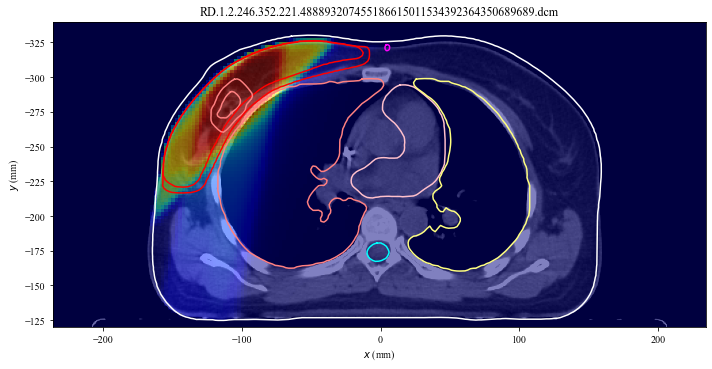

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
ss1.plot(ax=ax,show=False)
stdy.ct_doses[3].plot(ax=ax)
plt.show()

In [61]:
dose0.plot?

Signature:
dose0.plot(
    view=None,
    sl=None,
    idx=None,
    pos=None,
    ax=None,
    gs=None,
    figsize=None,
    zoom=None,
    colorbar=False,
    no_xlabel=False,
    no_ylabel=False,
    no_xticks=False,
    no_yticks=False,
    no_xtick_labels=False,
    no_ytick_labels=False,
    include_image=True,
    opacity=None,
    intensity=None,
    mpl_kwargs=None,
    show=True,
    mask=None,
    mask_threshold=0.5,
    masked=True,
    invert_mask=False,
    mask_color='black',
    **kwargs,
)
Docstring:
Plot this overlay, optionally overlaid on its associated Image.

**Parameters**:

view : str
    Orientation in which to compute the index. Can be "x-y", "y-z", or
    "x-z".  If None, the initial view is chosen to match
    the image orienation.

sl : int, default=None
    Slice number to plot. Takes precedence over <idx> and <pos> if not
    None. If all of <sl>, <idx>, and <pos> are None, the central
    slice will be plotted.

idx : int, default=None
    Index of the 

In [69]:
dose0.transform?

Signature:
dose0.transform(
    scale=1,
    translation=[0, 0, 0],
    rotation=[0, 0, 0],
    centre=[0, 0, 0],
    resample='fine',
    restore=True,
    order=1,
    fill_value=None,
)
Docstring:
Apply three-dimensional similarity transform using scikit-image.

The image is first translated, then is scaled and rotated
about the centre coordinates


**Parameters:**

scale : float, default=1
    Scaling factor.

translation : list, default=[0, 0, 0]
    Translation in mm in the [x, y, z] directions.

rotation : float, default=0
    Euler angles in degrees by which to rotate the image.
    Angles are in the order pitch (rotation about x-axis),
    yaw (rotation about y-axis), roll (rotation about z-axis).

centre : list, default=[0, 0, 0]
    Coordinates in mm in [x, y, z] about which to perform rotation
    and scaling of translated image.

resample: float/string, default='coarse'
    Resampling to be performed before image transformation.
    If resample is a float, then the image i